In [1]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.quantum_info import Statevector, partial_trace
from qiskit.visualization import plot_bloch_multivector
import numpy as np

### Sfera Blocha

Sfera Blocha jest to sfera jednostkowa, na której można przedstawić geometrycznie wszystkie możliwe czyste stany kwantowe kubitu. Stan dowolnego kubitu $\vert \psi \rangle$ można sparametryzować w następujący sposób (z dokładnością do nieistotnej fizycznie *fazy globalnej*):    
$ \vert \psi \rangle = \text{cos}\cfrac{\theta}{2} \, \vert 0 \rangle + e^{i\varphi} \text{sin}\cfrac{\theta}{2}\, \vert 1 \rangle$,$\qquad$ gdzie $\theta \in [0, \pi]$, $\varphi \in [0, 2\pi)$.  
Zauważmy, że wybór taki gwarantuje normalizację wektora ($\text{sin}x^2+\text{cos}x^2=1$ oraz $|e^{ix}|=1$ dla każdego $x \in \mathbb{R}$).  
Tak dobrany zestaw parametrów $\theta$, $\varphi$ jednoznacznie określa stan kwantowy kubitu. Parametry te można zinterpretować jako kąty i w ten sposób myśleć o stanach kwantowych jak o punktach na sferze o promieniu 1.

---
Poniżej możemy zwizualizować położenie różnych stanów na sferze Blocha.  
**Zadanie.** Wyświetlić położenie kilku różnych stanów kwantowych. Jakie stany znajdują się na biegunach sfery (w punktach przecięcia sfery z osią X, z osią Y oraz z osią Z)? 

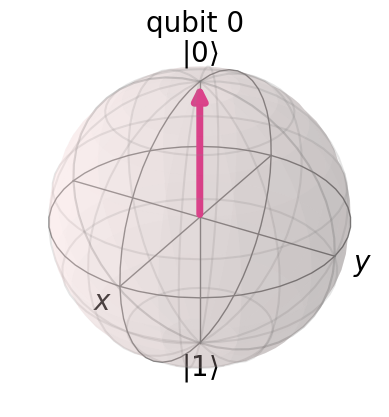

In [2]:
state_to_plot = Statevector(np.array([1,0]))
plot_bloch_multivector(state_to_plot)

*Uwaga* - w Qiskit istnieje też metoda `plot_bloch_vector()`, jednak działa ona zupełnie inaczej. Tam jako argument podaje się współrzędne $x$, $y$, $z$ do narysowania na sferze, a nie stan kwantowy. 

---

### Wizualizacja działania bramek kwantowych na sferze Blocha  

Transformacje z jednego stanu kwantowego do innego odpowiadają rotacjom (obrotom) na sferze Blocha.  
  
Macierze opisujące obrót wektora w 3D wokół każdej z osi $X$, $Y$ oraz $Z$ o dowolny kąt $\theta$ dane są wzorami (są to macierzowe reprezentacje tzw. bramek $R_X$, $R_Y$, $R_Z$):

$R_X = \begin{bmatrix} \text{cos}\cfrac{\theta}{2} & - i\,\text{sin}\cfrac{\theta}{2} \\ -i\,\text{sin}\cfrac{\theta}{2} &  \text{cos}\cfrac{\theta}{2} \end{bmatrix} \qquad$
$R_Y = \begin{bmatrix} \text{cos}\cfrac{\theta}{2} & - \text{sin}\cfrac{\theta}{2} \\  \text{sin}\cfrac{\theta}{2} &  \text{cos}\cfrac{\theta}{2} \end{bmatrix}$ $\qquad R_Z = \begin{bmatrix}  e^{-\frac{i}{2}\theta} & 0 \\ 0 &  e^{\frac{i}{2}\theta} \end{bmatrix} $  

Zauważmy, że bramki Pauliego X, Y, Z są szczególnymi przypadkami tych właśnie macierzy obrotu.  

**Zadanie.** Podać kąty $\theta$, dla jakich odpowiednie rotacje są równe bramkom Pauliego $X$, $Y$, $Z$.  
  
**Zadanie.** Używając kodu w komórce poniżej, sprawdzić działanie bramek Pauliego $X$, $Y$, $Z$ na różne wektory na sferze Blocha. Stan początkowy możemy ustalić w zmiennej `initial_state`. Na rysunku po lewej stronie wyświetlony zostanie stan początkowy kubitu, po prawej - stan po zadziałaniu daną bramką.  Jakiego efektu powinniśmy się spodziewać, znając odpowiedź do poprzedniego zadania?  
 

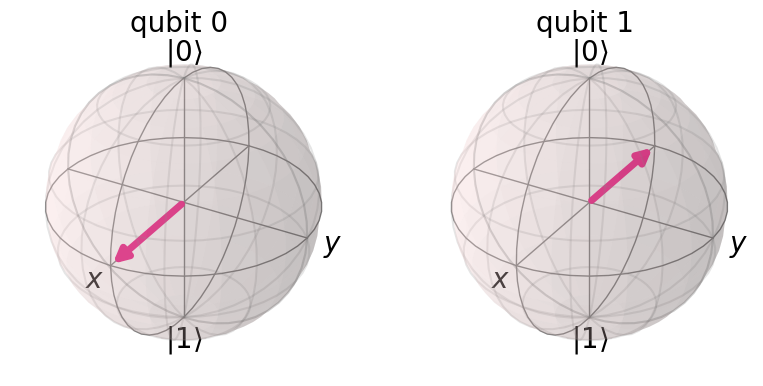

In [3]:
# Tworzymy obwód z dwoma kubitami
qc = QuantumCircuit(2)

# Inicjalizujemy oba kubity w tym samym stanie początkowym
initial_state = np.array([1,1])/np.sqrt(2) 
qc.initialize(initial_state, 0)
qc.initialize(initial_state, 1)

# Pierwszy kubit zostawiamy nieruszony (jako referencję), 
# na drugi kubit działamy wybraną bramką
qc.y(1) 
qc.draw()

# Rysujemy stan każdego z kubitów na sferze Blocha
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

### Ogólna postać stanu kwantowego

Znając reprezentację na sferze Blocha oraz działanie bramek kwantowych możemy napisać funkcję, która ze stanu początkowego $\vert 0 \rangle$ wygeneruje nam dowolny stan kwantowy kubitu, używając parametrów $\theta$ oraz $\varphi$. Może to być pomocne, jeżeli w jakimś celu będziemy chcieli "przemiatać" przestrzeń stanów, na przykład w celu weryfikacji działania algorytmu.

In [4]:
def create_state_psi(theta, phi):
    
    # theta = 0 => układ jest w stanie |0>
    # theta = pi => układ jest w stanie |1>
    
    psi_circuit = QuantumCircuit(1)
    psi_circuit.ry(theta, 0)             # obrót o kąt theta dookoła osi Y
    psi_circuit.rz(phi, 0)               # obrót o kąt phi dookoła osi Z
    
    return psi_circuit

In [5]:
qc = create_state_psi(np.pi/2, 0)
Statevector(qc)

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))
